In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# import matplotlib.patheffects as path_effects
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import os,glob,re
import numpy as np
from datetime import datetime as dt
from datetime import timedelta as td
# from Bio import SeqIO
# from collections import Counter

import baltic as bt

case_path='/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/non-public/NVSC_cases.csv'

cases={}
county_cases={}
muni_cases={}

for line in open(case_path,'r'):
    l=line.strip('\n').split('\t')
#     print(l)
    if l[0]=='e484k_positive':
        pass
    else:
        present,date,county,muni=l
        
        present=True if present=='1' else False
        date=date.split(' ')[0]
#         print(date)
#         if date not in cases: cases[date]={True: 0, False: 0}
        
        if date not in muni_cases: muni_cases[date]={}
        if muni not in muni_cases[date]: muni_cases[date][muni]={True: 0, False: 0}
            
        muni_cases[date][muni][present]+=1
        
        
        if date not in county_cases: county_cases[date]={}
        if county not in county_cases[date]: county_cases[date][county]={True: 0, False: 0}
            
        county_cases[date][county][present]+=1

# print(cases)
#         print(date)
#         print(bt.decimalDate(date))
sorted_xs=sorted(muni_cases.keys(),key=lambda w: bt.decimalDate(w))

start,end=sorted_xs[0],sorted_xs[-1]
print(start,end)

timeline=[]
date=dt.strptime(start,'%Y-%m-%d')

while date<dt.strptime(end,'%Y-%m-%d')+td(days=2):
#     print(date)
    timeline.append(dt.strftime(date,'%Y-%m-%d'))
    date=date+td(days=1)
    
print(timeline)

2021-03-24 2021-04-27
['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28']


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 4, 4, 0, 7, 2, 0, 0, 4, 0, 0, 10, 0, 0, 0, 1, 5, 0, 1, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 9, 8, 0, 12, 2, 0, 1, 11, 1, 2, 11, 6, 0, 0, 3, 7, 0, 2, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 0, 1, 0, 1, 0, 2, 4, 4, 2, 4, 1, 4, 1, 8, 1, 0, 0, 0, 0] [1, 0, 0, 0, 4, 11, 9, 4, 62, 41, 19, 45, 61, 124, 151, 123, 166, 31, 29, 107, 130, 69, 24, 74, 50, 27, 69, 34, 29, 5, 37, 1, 37, 0, 3, 0]
43 41
81 1577


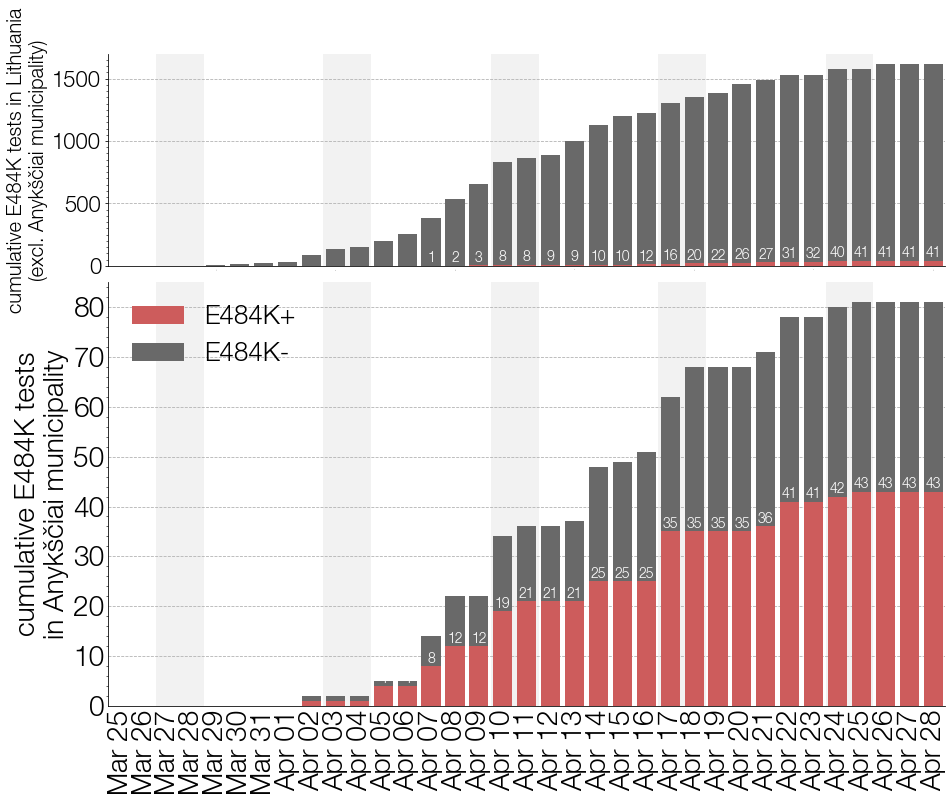

In [2]:
# print(muni_cases)

xs=timeline
posA=[]
totA=[]

posB=[]
totB=[]
# 'Anykščių r. sav.'
for d in timeline:
    
    Anyksciai_positive=muni_cases[d]['Anykščių r. sav.'][True] if d in muni_cases and 'Anykščių r. sav.' in muni_cases[d] else 0
    Anyksciai_negative=muni_cases[d]['Anykščių r. sav.'][False] if d in muni_cases and 'Anykščių r. sav.' in muni_cases[d] else 0
    
    posA.append(Anyksciai_positive)
    totA.append(Anyksciai_positive+Anyksciai_negative)
    
    
    other_positive=0
    other_negative=0
    if d in muni_cases:
        for muni in muni_cases[d]:
            if muni!='Anykščių r. sav.':
                other_positive+=muni_cases[d][muni][True]
                other_negative+=muni_cases[d][muni][False]
        posB.append(other_positive)
        totB.append(other_positive+other_negative)
        
    else: ## nothing to report for day
        posB.append(0)
        totB.append(0)
    
print(posA,totA)
print(posB,totB)

fig = plt.subplots(figsize=(15,12),facecolor='w')

gs = GridSpec(2,1,hspace=0.05,wspace=0.01,height_ratios=[1,2])

ax2=plt.subplot(gs[0])

print(sum(posA),sum(posB))
print(sum(totA),sum(totB))

ax2.bar(range(len(timeline)),[sum(posB[:i]) for i in range(len(timeline))],facecolor='indianred',zorder=101,label='E484K+')
ax2.bar(range(len(timeline)),[sum(totB[:i]) for i in range(len(timeline))],bottom=[sum(posB[:i]) for i in range(len(timeline))],facecolor='dimgrey',zorder=100,label='E484K-')

ax2.tick_params(axis='x',size=0,labelsize=0)
[ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['bottom','left']]

ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(500))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax2.grid(axis='y',ls='--',zorder=0)

ax2.set_ylabel('cumulative E484K tests in Lithuania\n(excl. Anykščiai municipality)',size=20)
# ax2.set_yscale('log')

ax=plt.subplot(gs[1])

ax.bar(range(len(timeline)),[sum(posA[:i]) for i in range(len(timeline))],facecolor='indianred',zorder=101,label='E484K+')
ax.bar(range(len(timeline)),[sum(totA[:i]) for i in range(len(timeline))],facecolor='dimgrey',zorder=100,label='E484K-')

for x,y in zip(range(len(timeline)),[sum(posB[:i]) for i in range(len(timeline))]):
    if y>0:
        ax2.text(x,y+5,y,color='w',size=14,zorder=101,ha='center',va='bottom')

for x,y in zip(range(len(timeline)),[sum(posA[:i]) for i in range(len(timeline))]):
    if y>3:
        ax.text(x,y+0.1,y,color='w',size=14,zorder=101,ha='center',va='bottom')

        
ax.legend(loc=2,frameon=False,fontsize=26)

ax.set_xticks(range(len(timeline)))
ax.set_xticklabels([bt.convertDate(d,'%Y-%m-%d','%b %d') for d in timeline],rotation=90)

for t,d in enumerate(timeline):
    if bt.convertDate(d,'%Y-%m-%d','%A')=='Saturday':
        ax.axvspan(t-0.5,t+1.5,facecolor='k',edgecolor='none',alpha=0.05,zorder=0)
        ax2.axvspan(t-0.5,t+1.5,facecolor='k',edgecolor='none',alpha=0.05,zorder=0)

ax.grid(axis='y',ls='--',zorder=0)

# ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.set_ylabel('cumulative E484K tests\nin Anykščiai municipality',size=28)


ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
# ax.set_ylabel('cumulative cases in Lithuanian town',size=28)

ax.tick_params(size=0,labelsize=28)
ax.set_xlim(-0.5,len(timeline)-0.5)
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom','left']]

ax2.set_xlim(0.5,len(timeline)-0.5)
ax.set_xlim(ax2.get_xlim())
plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/SuppFig1_townCases.png',dpi=100,bbox_inches='tight')

plt.show()